In [11]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Norm, Stan, Robust, log

In [3]:
df = pd.read_csv('D:/PycharmProjects/pythonProject/train_test_combine_wo_lag.csv',header = 0)
features = ['Ammonia Nitrogen','NOx','Dissolved Oxygen','pH','Water Temperature','Turbidity','Total Phosphorus','Air Temperature','Specific Humidity','Wind Speed','Precipitation','Shortwave radiation flux','Developed Percent']
x = df.drop(columns=['Agricultural Percent','Chl_current'])
y = df["Chl_current"]

In [4]:
x.head()

,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
0,0.120000,0.010000,6.920000,7.94,24.120000,0.500000,0.004000,20.610000,0.012005,1.269212,80.1024,170.950,0.950742
1,0.082718,0.070539,7.040000,8.03,21.970000,0.901990,0.007586,22.730000,0.013627,2.976928,56.9728,210.145,0.950742
2,0.060000,0.020000,6.633333,8.04,26.016667,0.500000,0.006000,24.400000,0.014794,2.124735,69.8112,248.080,0.950742
3,0.080370,0.070048,6.820000,7.99,24.906667,1.019418,0.007491,24.030039,0.013869,1.518190,136.8320,244.566,0.950742
4,0.110000,0.030000,5.820000,8.00,27.086667,1.000000,0.007000,26.550000,0.016619,2.083387,104.5632,272.162,0.950742


In [5]:
features = list(x.columns)
features

['Ammonia Nitrogen',
 'NOx',
 'Dissolved Oxygen',
 'pH',
 'Water Temperature',
 'Turbidity',
 'Total Phosphorus',
 'Air Temperature',
 'Specific Humidity',
 'Wind Speed',
 'Precipitation',
 'Shortwave Radiation Flux',
 'Developed Percent']

In [15]:
# extract data from csv
# train_data = pd.read_csv('D:/PycharmProjects/pythonProject/train_data_w_lag.csv',header = 0)
# test_data = pd.read_csv('D:/PycharmProjects/pythonProject/test_data_w_lag.csv',header = 0)

In [7]:
# train data are from 1997 to 2015, test data are from 2016 to 2020
# train 79% test 21%

# original data without transforming
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

'''
Xtrain = train_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Xtest = test_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Ytrain = train_data["Chl_1m_lag"]
Ytest = test_data["Chl_1m_lag"]
'''

'\nXtrain = train_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nXtest = test_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nYtrain = train_data["Chl_1m_lag"]\nYtest = test_data["Chl_1m_lag"]\n'

In [8]:
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

In [16]:
# Grid search

best_score = 0
for max_depth in [20, 50, 200, 500, 800, 1000, 1200]:
    for min_samples_split in [2, 10, 18, 26, 34, 42, 50]:
        for min_samples_leaf in [3, 11, 19, 27, 35, 43, 51]:
            for max_features in [0.8, 0.9, 1.0]:
                
                DTR = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                           max_features=max_features)
                DTR.fit(Xtrain,Ytrain)
                score = DTR.score(Xtest,Ytest)
                if score > best_score:
                    best_score = score
                    best_parameters = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
                                      'max_features':max_features}


print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Best score:0.43
Best parameters:{'max_depth': 50, 'min_samples_split': 26, 'min_samples_leaf': 43, 'max_features': 0.9}


Data transformation in MLR shows that the results of original, stan, norm, robu are the same, and the log is higher than others

In [359]:
DTR = DecisionTreeRegressor(max_depth = 50, min_samples_split = 26, min_samples_leaf = 43, max_features = 0.9)

# 2.Train
DTR.fit(Xtrain,Ytrain)

# 3.Scores
y_predict_xtrain = DTR.predict(Xtrain)
y_predict_xtest = DTR.predict(Xtest)

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.47307233335745413
R2 for test: 0.4014026671081605
MAE for train: 0.6665194285215522
MAE for test: 0.7830585973300487
MSE for train: 1.5734997702467686
MSE for test: 1.688810000696242
MAPE for train 0.8908007397813666
MAPE for test 0.6267457807543401


In [108]:
# log
y_log = np.log(y)

Xtrain = x[:2736]
Ytrain_log = y_log[:2736]
Xtest = x.tail(720)
Ytest_log = y_log.tail(720)

In [141]:
# log y

DTR = DecisionTreeRegressor(max_depth = 200, min_samples_split = 26, min_samples_leaf = 35, max_features = 0.8)

# 2.Train
DTR.fit(Xtrain,Ytrain_log)

# 3.Scores
y_predict_xtrain = np.exp(DTR.predict(Xtrain))
y_predict_xtest = np.exp(DTR.predict(Xtest))

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.4008637558365655
R2 for test: 0.3889725796019007
MAE for train: 0.6279702135695191
MAE for test: 0.7684762812089728
MSE for train: 1.789127430989891
MSE for test: 1.7238787438005387
MAPE for train 0.5807158704559433
MAPE for test 0.5545890102845733


In [142]:
# same as MAPE
PercentBias_train = np.mean(np.abs((Ytrain - y_predict_xtrain) / Ytrain)) * 100
PercentBias_train

58.071587045594384

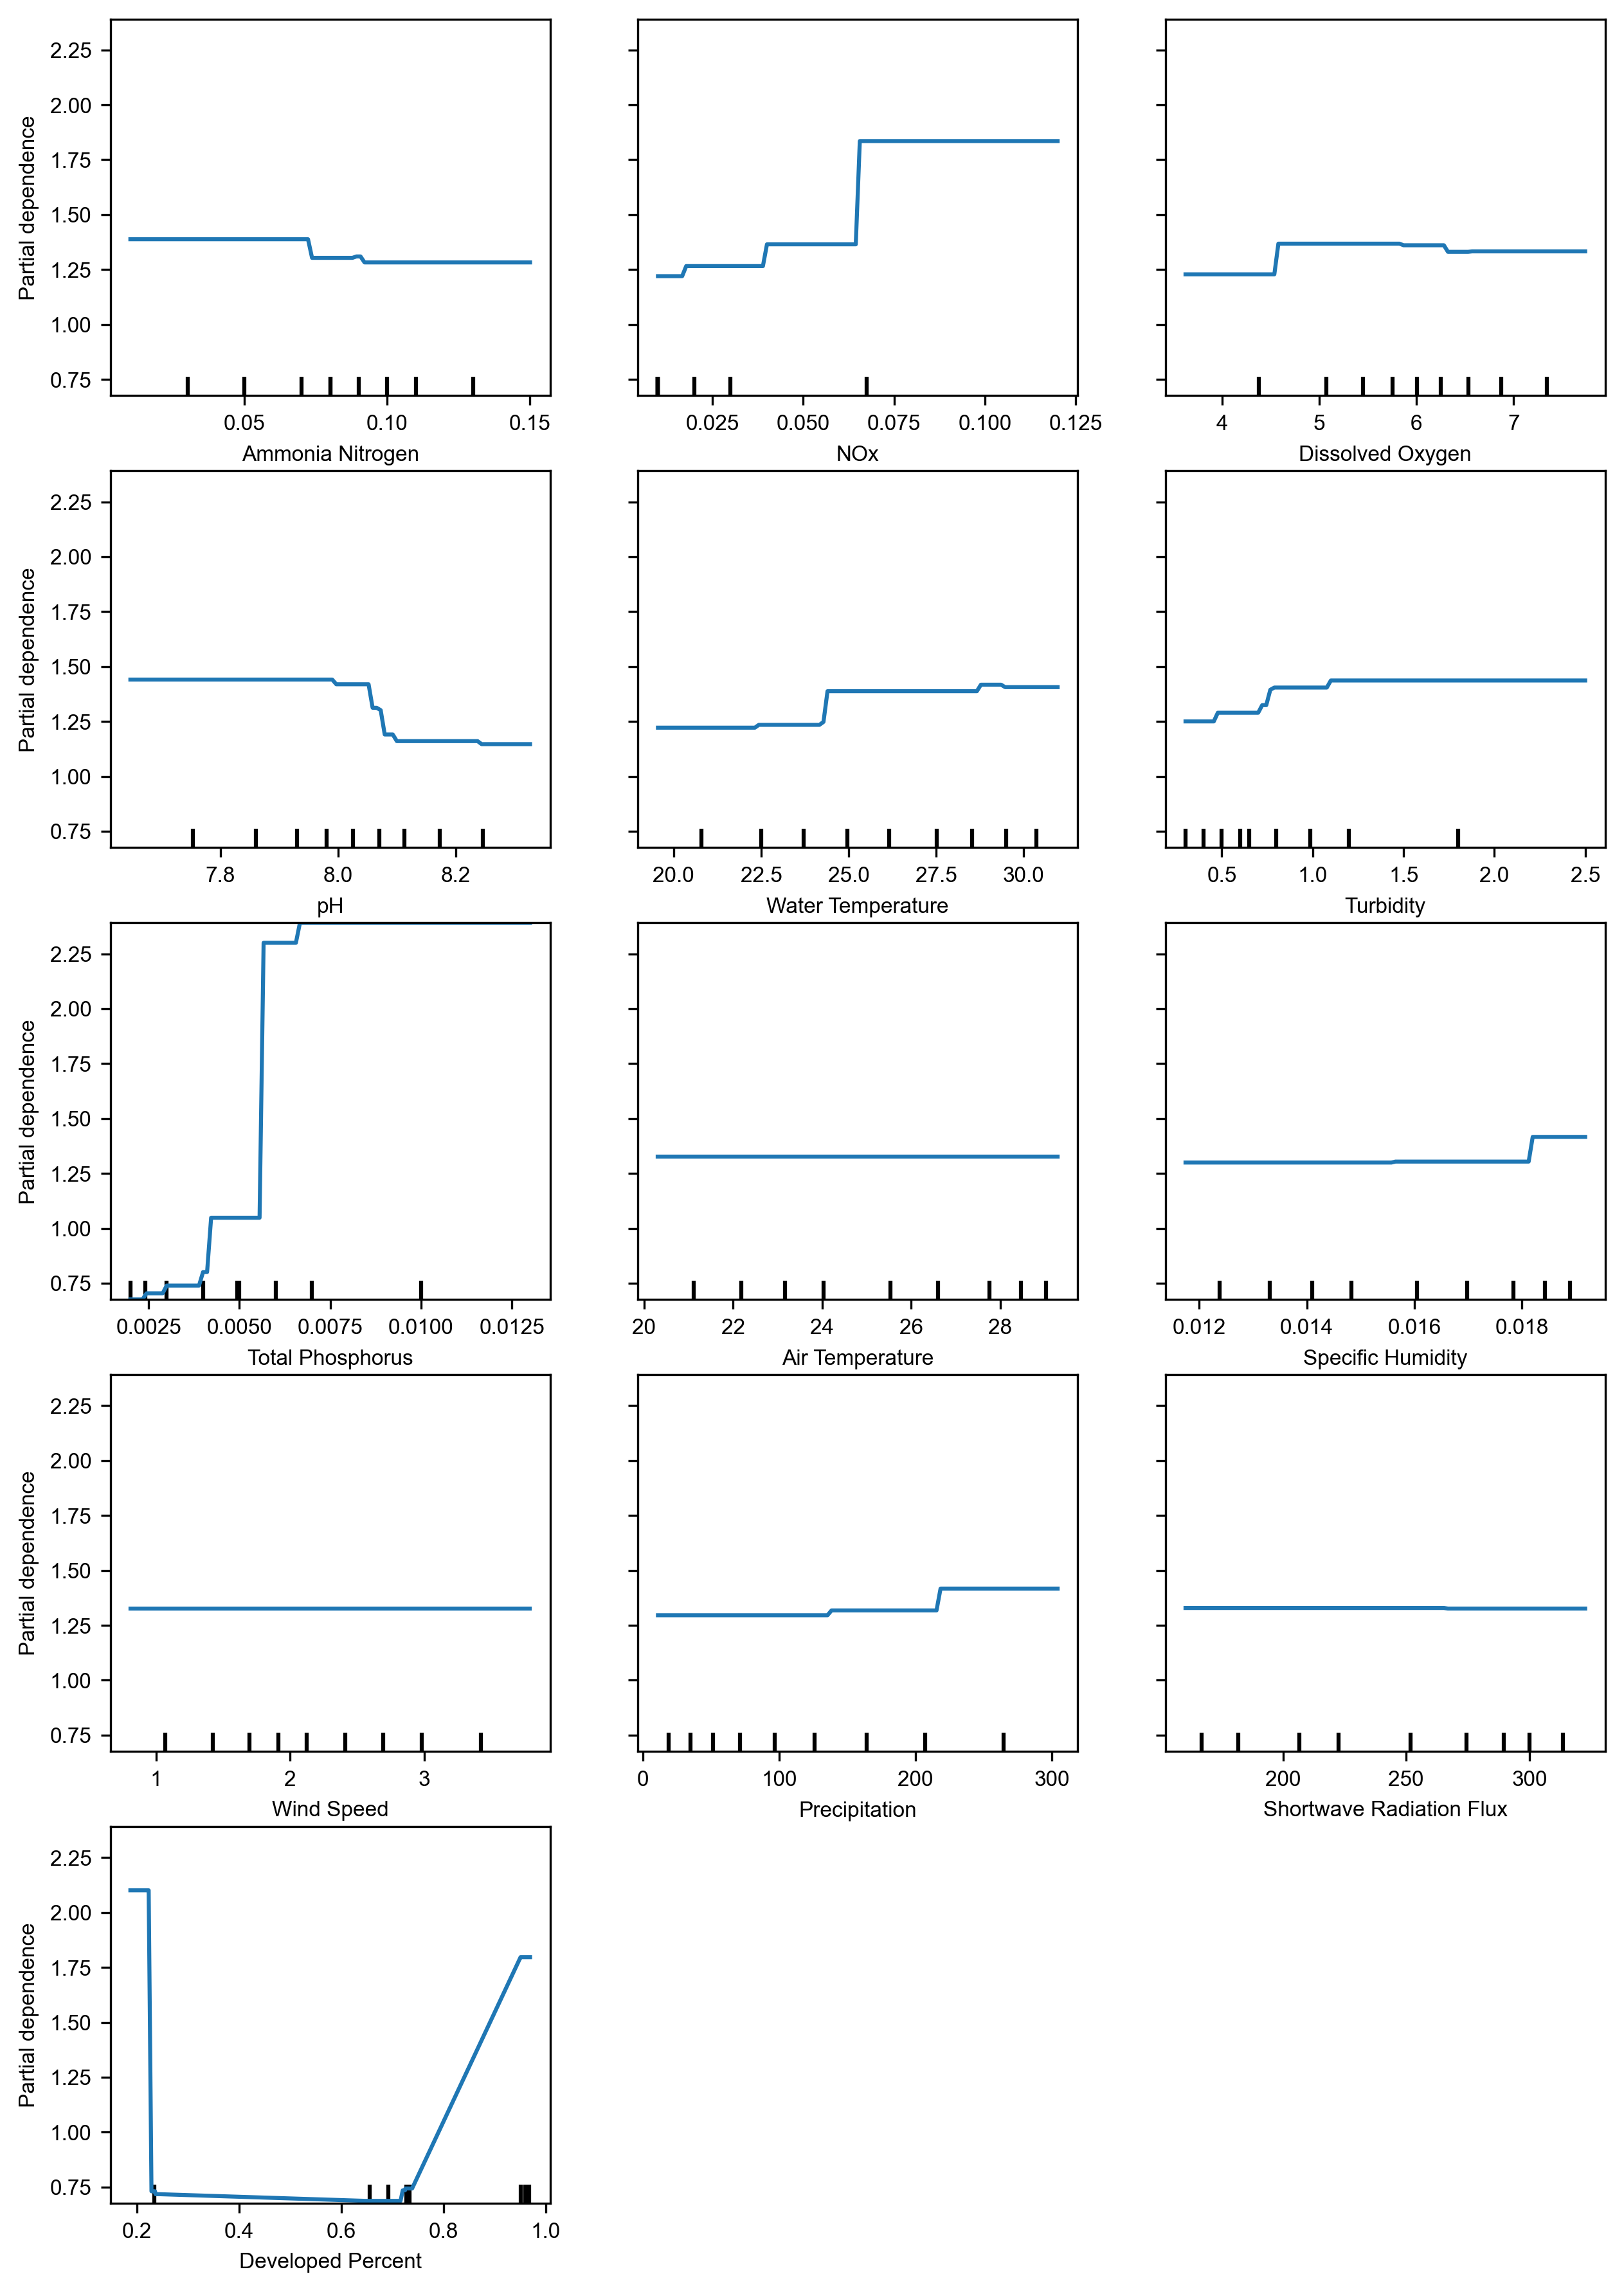

In [361]:
from sklearn.inspection import PartialDependenceDisplay
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':300,'font.size': 8,'font.family':'arial'})
disp1 = PartialDependenceDisplay.from_estimator(DTR, x,
                                                [0,1,2,3,4,5,6,7,8,9,10,11,12])

In [365]:
importance = DTR.feature_importances_
print(importance)
print([*zip(features,DTR.feature_importances_)])

[2.08787156e-02 1.20985953e-01 2.09471539e-02 3.22617247e-02
 1.60242898e-02 1.29230923e-02 4.12048758e-01 0.00000000e+00
 3.83280772e-03 0.00000000e+00 1.28940984e-02 2.95798730e-05
 3.47173827e-01]
[('Ammonia Nitrogen', 0.020878715605451965), ('NOx', 0.12098595284303072), ('Dissolved Oxygen', 0.02094715392864122), ('pH', 0.03226172472944055), ('Water Temperature', 0.016024289836843467), ('Turbidity', 0.012923092273971324), ('Total Phosphorus', 0.41204875750398295), ('Air Temperature', 0.0), ('Specific Humidity', 0.0038328077183625623), ('Wind Speed', 0.0), ('Precipitation', 0.012894098367536862), ('Shortwave Radiation Flux', 2.9579873041250183e-05), ('Developed Percent', 0.34717382731969704)]


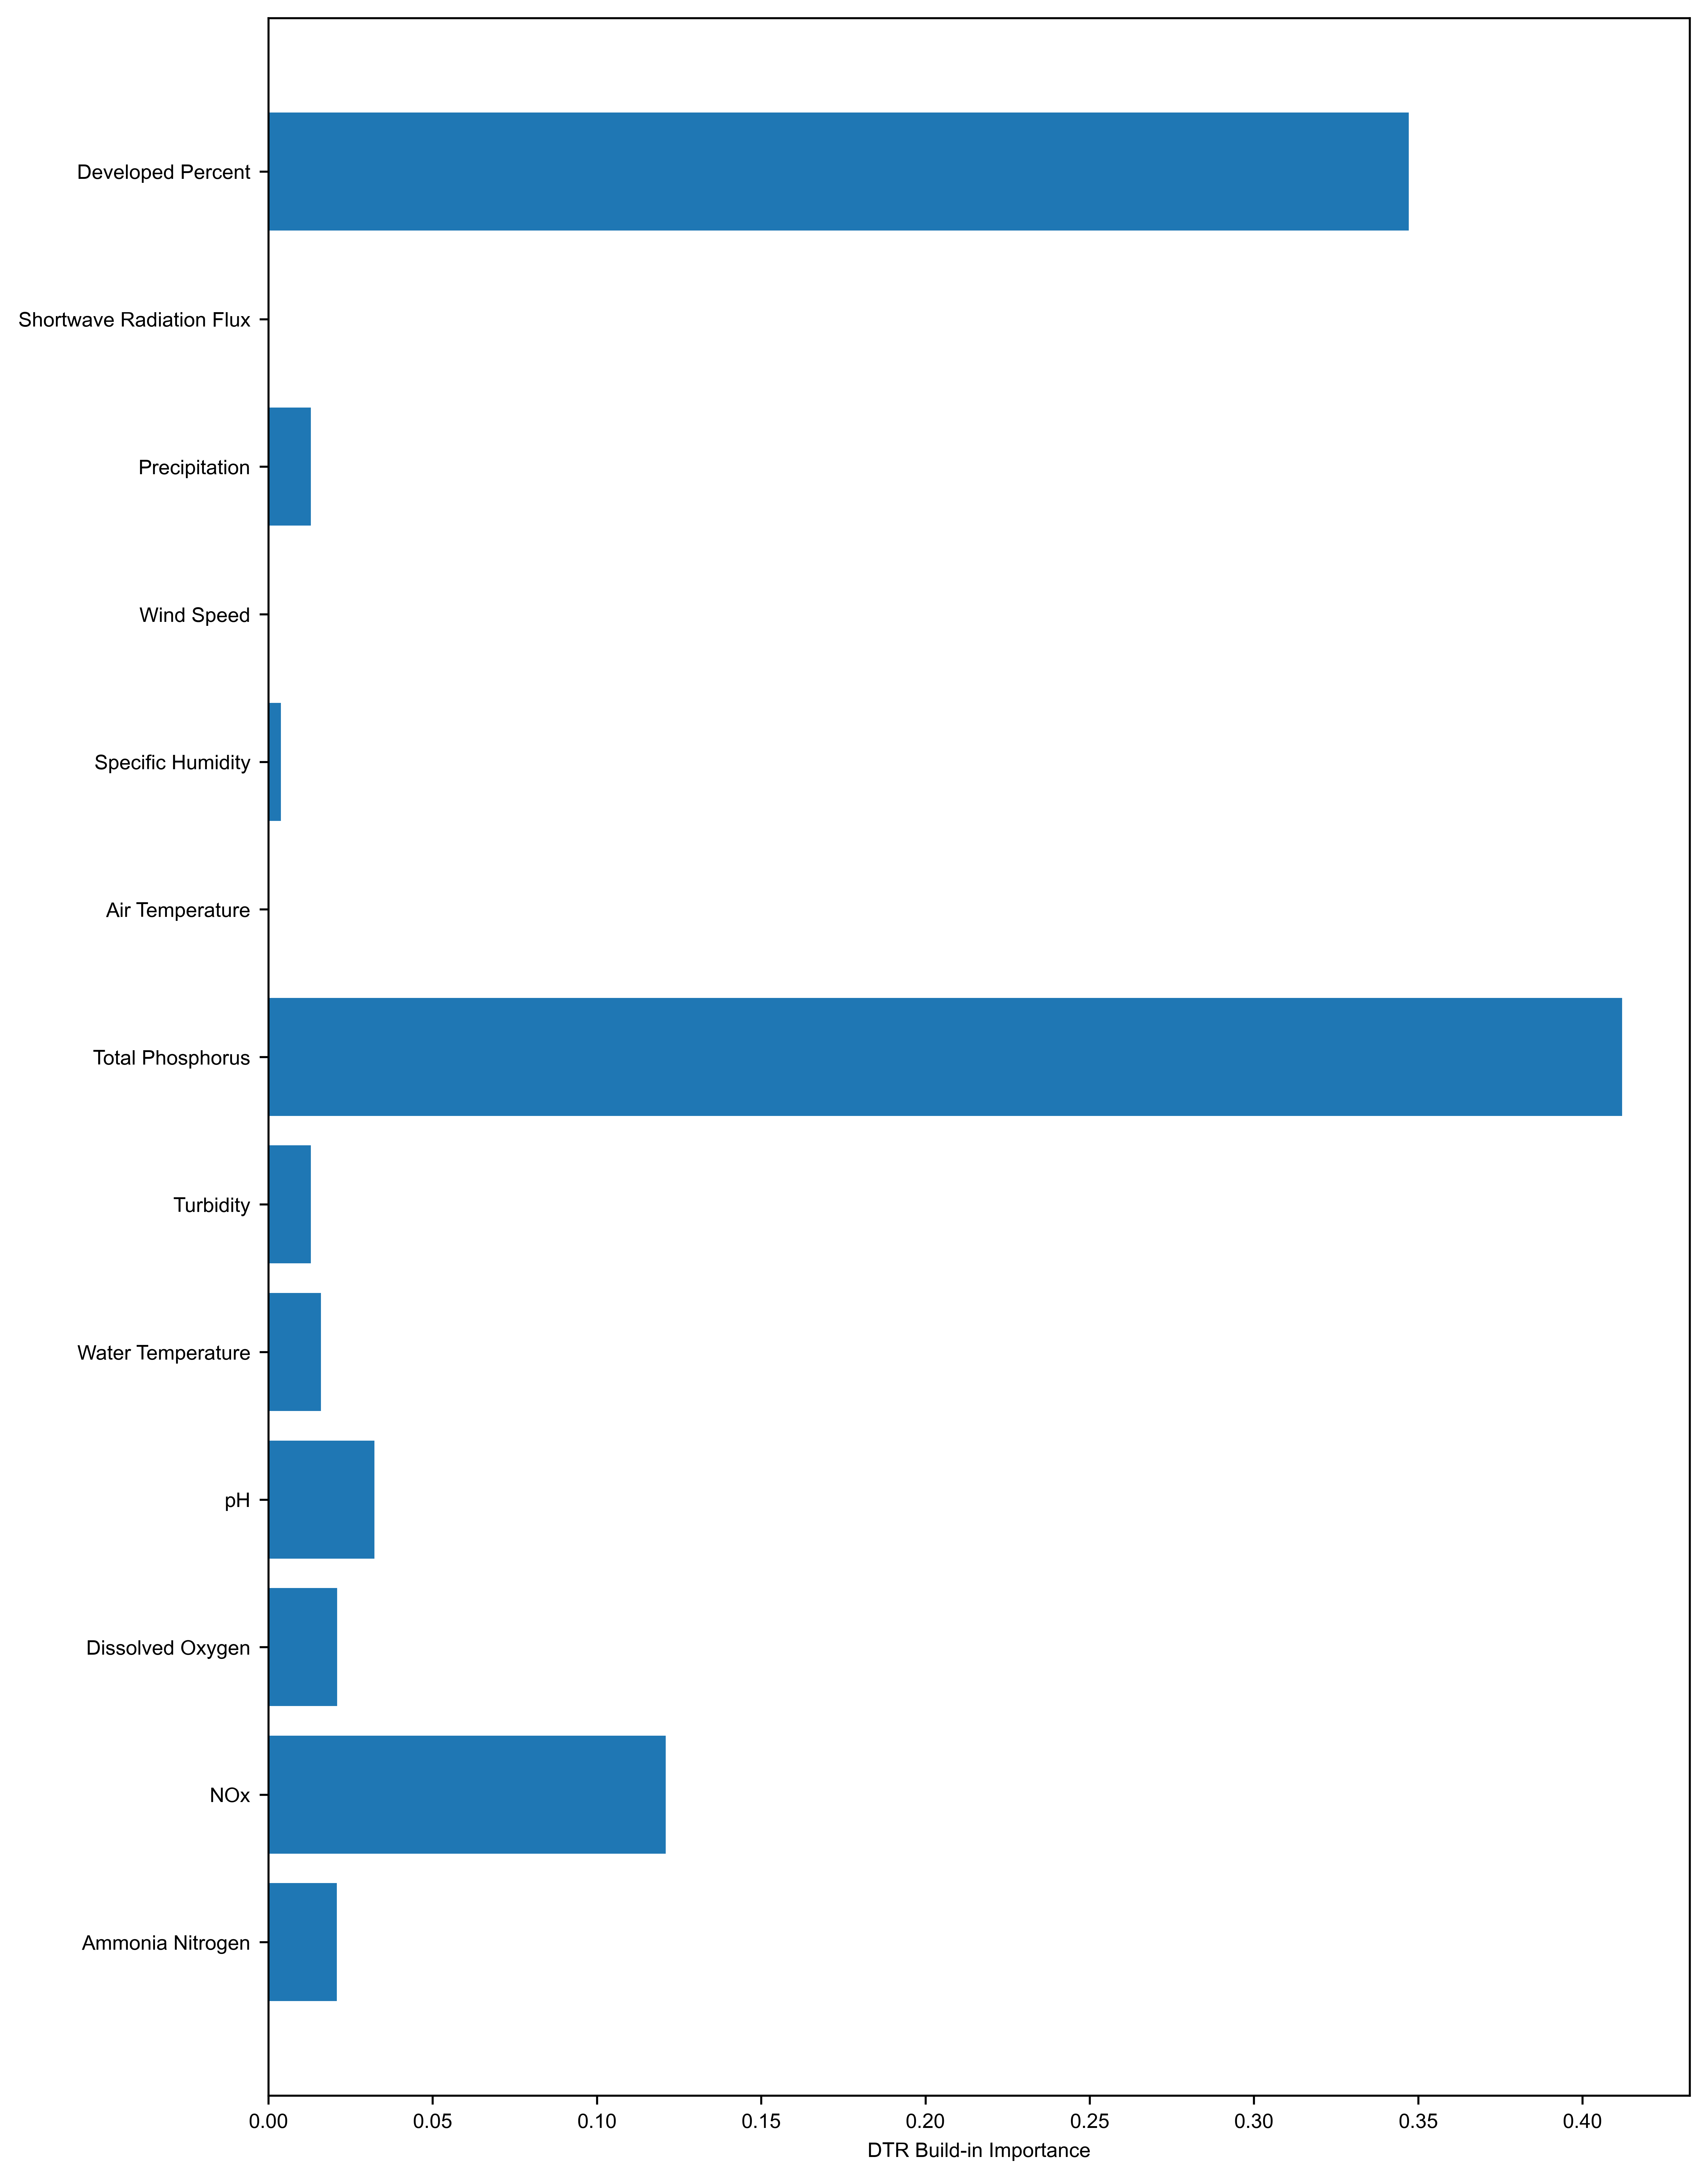

In [367]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
# create dataset
height = DTR.feature_importances_
bars = (features)
plt.figure(dpi=600)
plt.xlabel('DTR Build-in Importance')
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
# Show graphic
plt.show()

[ 2.97397858e-02  8.99934531e-02  4.01142462e-02  2.86816290e-02
  5.14974221e-02  9.13492049e-03  1.45615779e-01  0.00000000e+00
  3.25942497e-03  0.00000000e+00  1.10394919e-02 -3.93172623e-06
  3.09686159e-01]


Text(0.5, 0, 'DTR Permutation Importance')

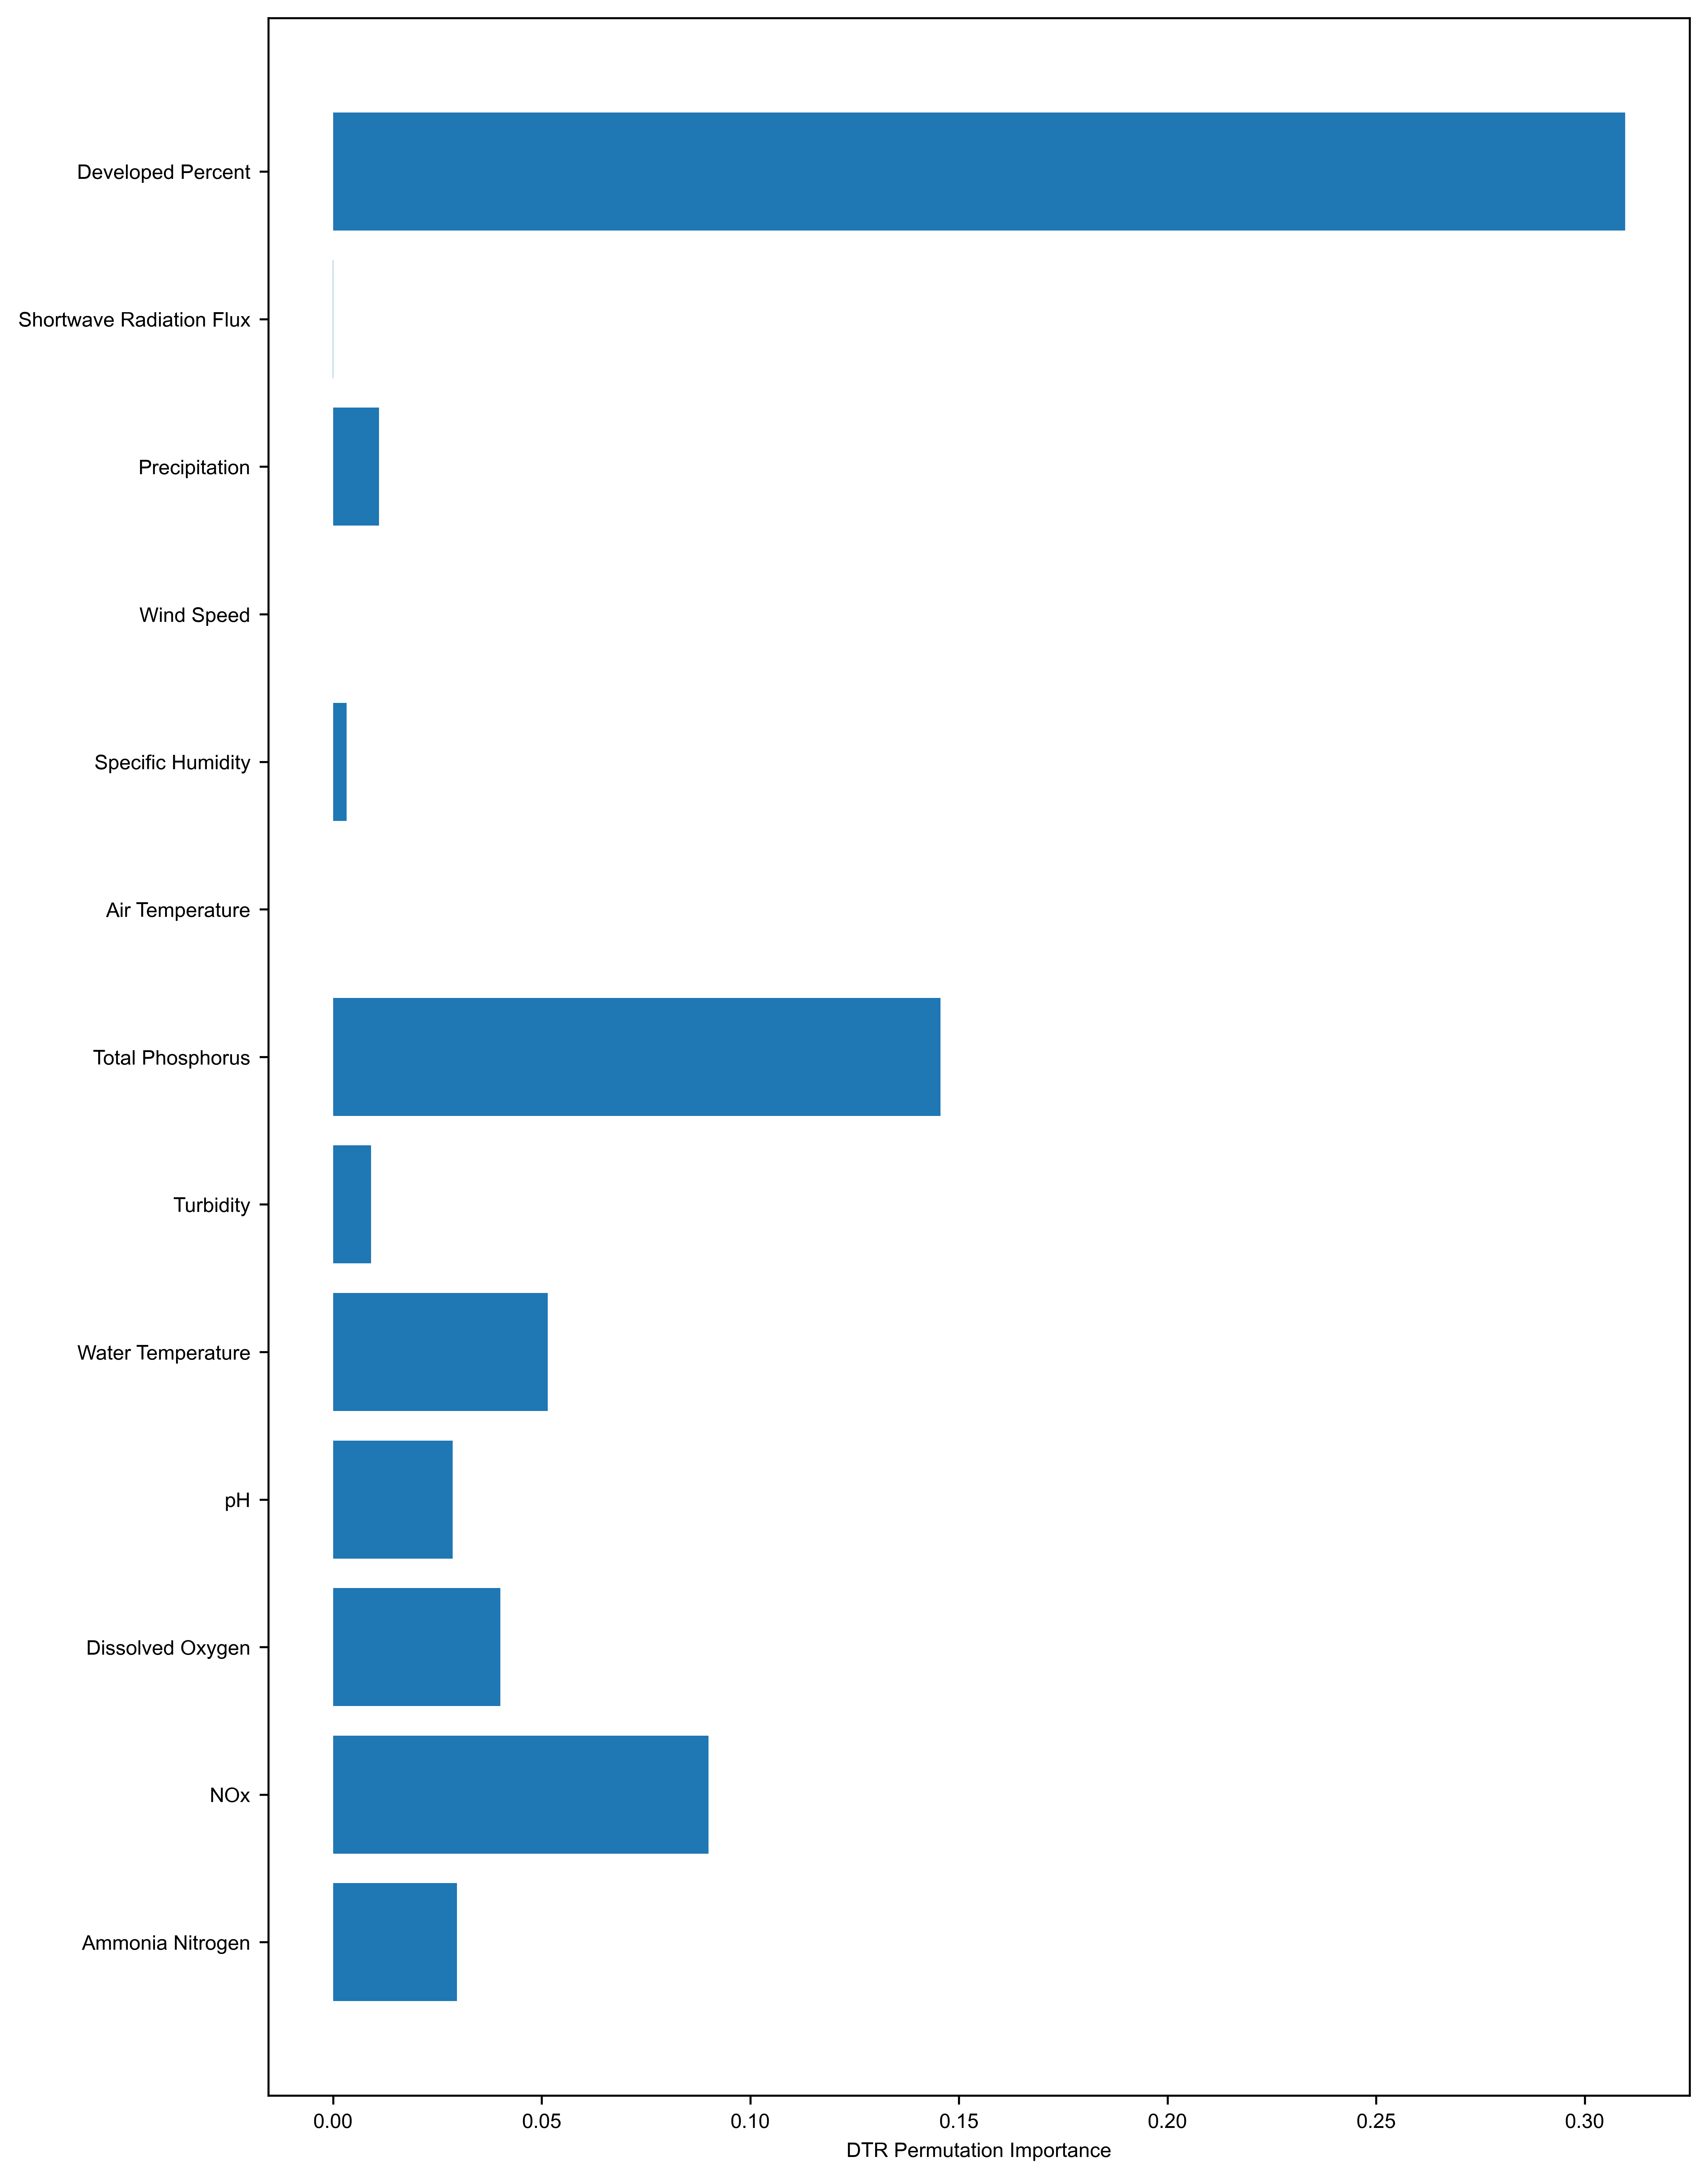

In [368]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(DTR, Xtest, Ytest)
print(perm_importance.importances_mean)
# sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(dpi=600)
plt.barh(features, perm_importance.importances_mean)
plt.xlabel("DTR Permutation Importance")

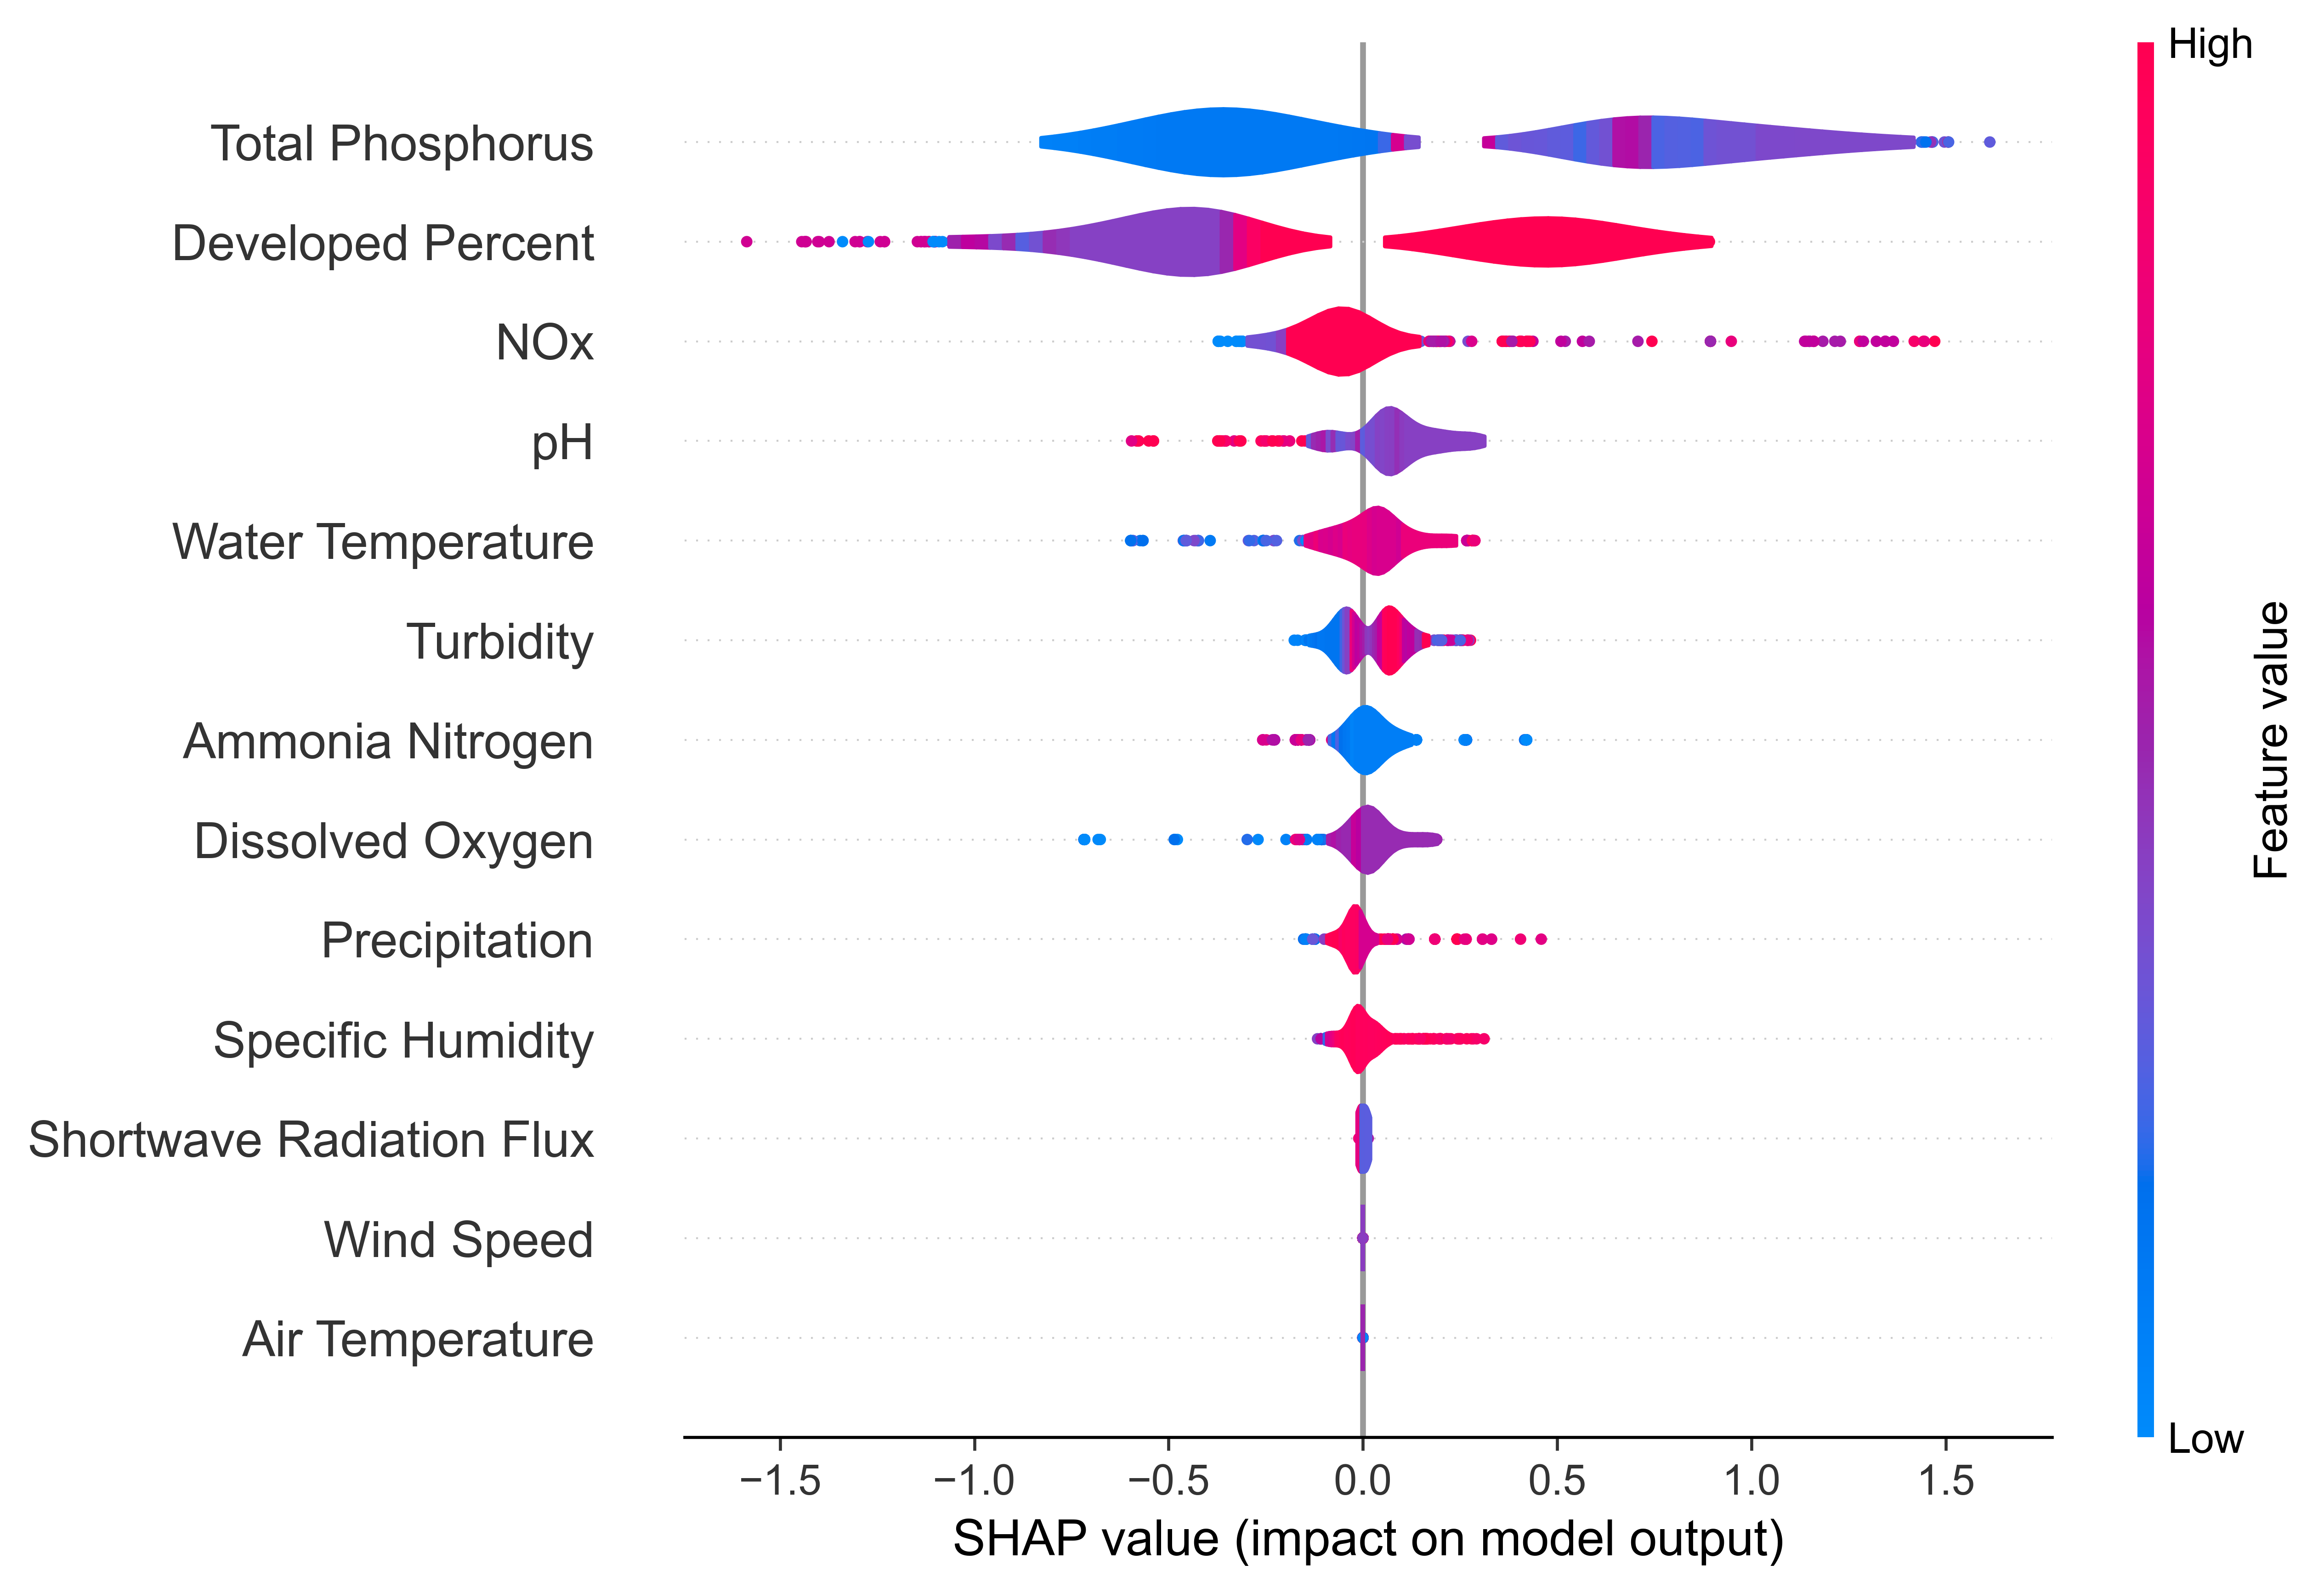

In [369]:
import shap
explainer = shap.TreeExplainer(DTR)
shap_values = explainer.shap_values(Xtest)
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest, plot_type="violin")

In [370]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([Xtest.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
6,Total Phosphorus,0.587122
12,Developed Percent,0.528001
1,NOx,0.147108
3,pH,0.12248
4,Water Temperature,0.094683
5,Turbidity,0.078914
0,Ammonia Nitrogen,0.067852
2,Dissolved Oxygen,0.063619
10,Precipitation,0.046427
8,Specific Humidity,0.043234


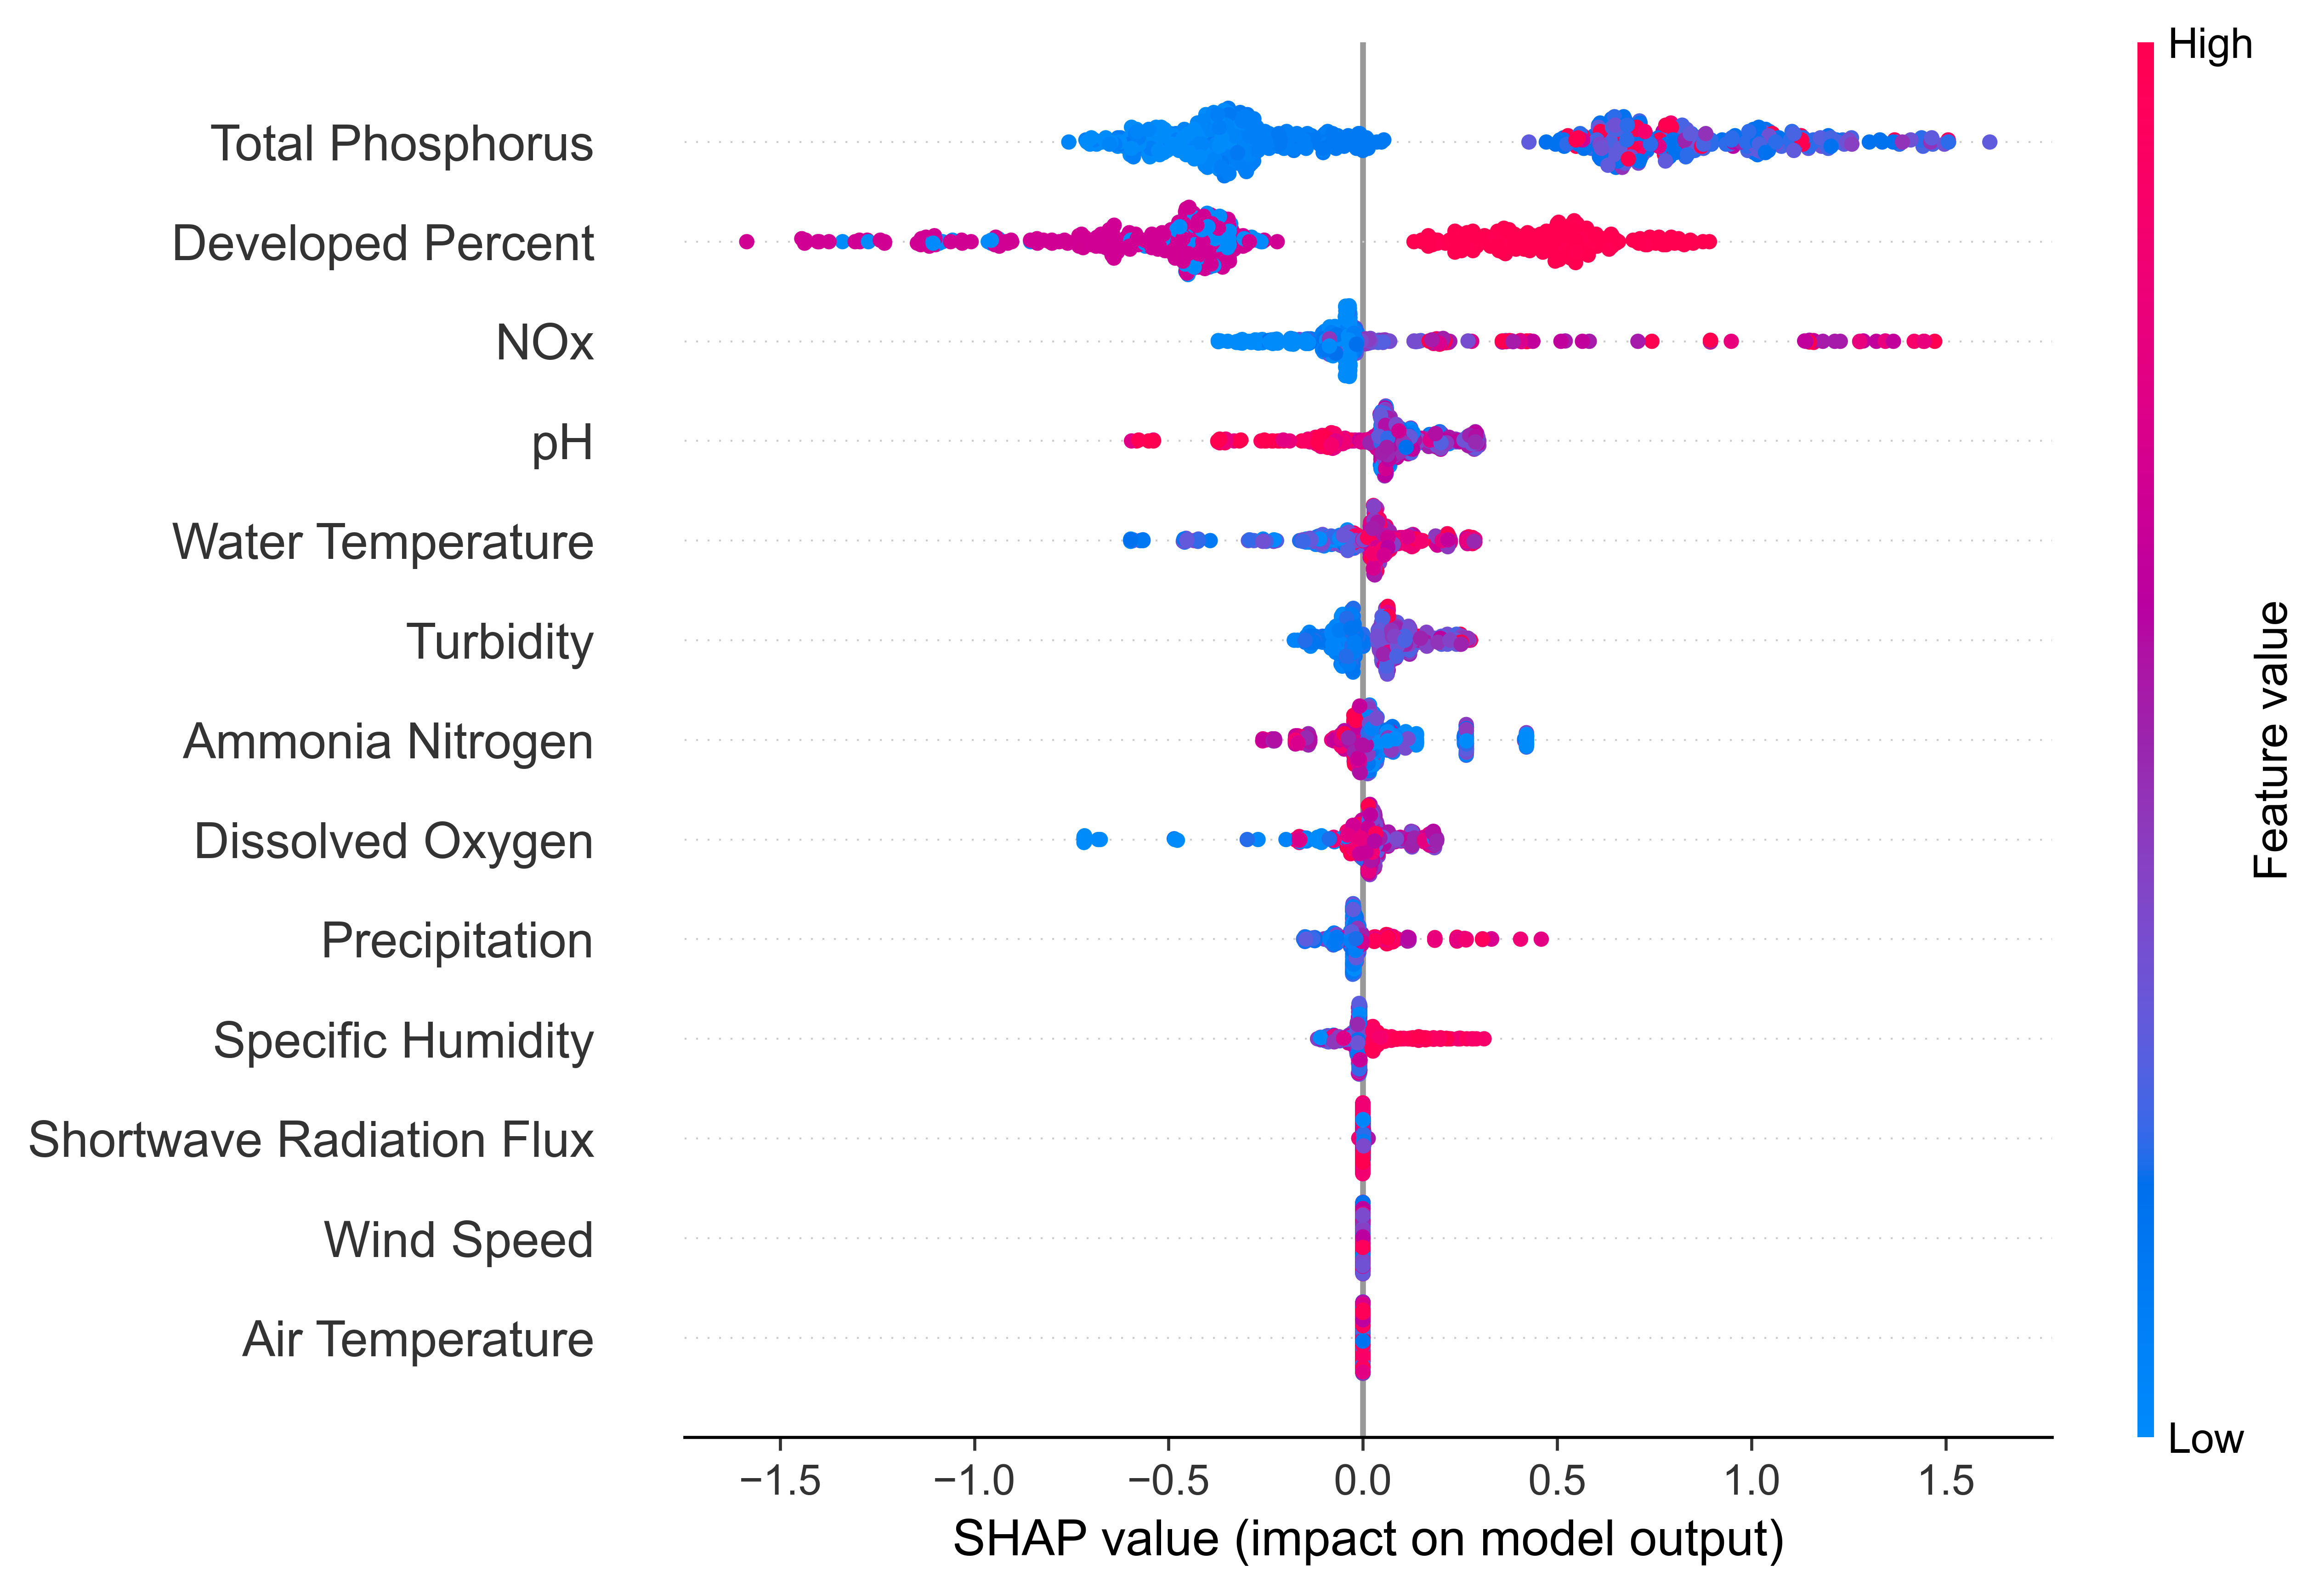

In [371]:
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest)

In [372]:
m = pd.Series(y_predict_xtrain, index=Ytrain.index, name='Predicted Chlorophyll-a')

In [373]:
AllY_train = pd.concat([Ytrain,m],axis=1)
AllY_train

,Chl_current,Predicted Chlorophyll-a
0,2.540000,0.877907
1,3.759632,4.370200
2,2.860000,3.911129
3,3.692863,5.069514
4,5.130000,2.913333
...,...,...
2731,1.400000,0.775004
2732,0.860000,0.775004
2733,0.460000,0.619070
2734,0.540000,0.619070


In [374]:
n = pd.Series(y_predict_xtest, index=Ytest.index, name='Predicted Chlorophyll-a')

In [375]:
AllY_test = pd.concat([Ytest,n],axis=1)
AllY_test

,Chl_current,Predicted Chlorophyll-a
2736,3.080000,5.069514
2737,6.830000,4.370200
2738,4.349878,2.913333
2739,2.740000,2.190000
2740,2.210000,1.203478
...,...,...
3451,0.600000,0.775004
3452,0.480000,0.775004
3453,0.630000,0.775004
3454,0.930000,0.670489


In [376]:
All_Y = pd.concat([AllY_train,AllY_test],ignore_index = True)
All_Y_sorted = All_Y.sort_index()
All_Y_sorted

,Chl_current,Predicted Chlorophyll-a
0,2.540000,0.877907
1,3.759632,4.370200
2,2.860000,3.911129
3,3.692863,5.069514
4,5.130000,2.913333
...,...,...
3451,0.600000,0.775004
3452,0.480000,0.775004
3453,0.630000,0.775004
3454,0.930000,0.670489


In [377]:
All_Y.loc[0]

Chl_current                2.540000
Predicted Chlorophyll-a    0.877907
Name: 0, dtype: float64

In [378]:
All_Y_sorted.to_excel (r'C:/Users/yanzh/OneDrive - Florida State Students/桌面/export_dataframe.xlsx', index = False, header=True)

In [380]:
import os
import joblib
joblib.dump(DTR, "./DTR_wolag.joblib")

['./DTR_wolag.joblib']

In [381]:
import os
import joblib
loaded_DTR = joblib.load("./DTR_wolag.joblib")

In [385]:
aaaa = loaded_DTR.predict(x)

In [386]:
aaaa

array([0.87790698, 4.37019986, 3.91112919, ..., 0.77500392, 0.67048913,
       0.67048913])

In [67]:
len(aaaa)

3456